In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from classes.Visualizations import *
from classes.Data import  loadResNIST, loadResNIST_balanced
from classes.Specs import specs

import logging

DATADIR='./resNIST'
LOGDIR = './perceptron_classifier_logs/'
PROJECTORDIR=LOGDIR+'projector/'
summary_writer = tf.summary.FileWriter(LOGDIR)

image_size=48
#scopes = ['dnn/hiddenlayer_0/LeakyRelu:0','dnn/hiddenlayer_1/LeakyRelu:0','dnn/hiddenlayer_2/LeakyRelu:0','dnn/head/labels:0']
scopes = ['dnn/hiddenlayer_2/LeakyRelu:0','dnn/head/labels:0']

In [ ]:
train_data, train_labels , eval_data, eval_labels    = loadResNIST(DATADIR, image_size)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": train_data},
    y=train_labels,
    batch_size=128,
    num_epochs=None,
    shuffle=True)

eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": eval_data},
    y=eval_labels,
    num_epochs=1,
    shuffle=False)
feature_columns=[tf.feature_column.numeric_column("x",shape=[image_size,image_size])]

In [11]:
config=tf.estimator.RunConfig(save_checkpoints_steps=1000)

perceptronclassifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    config=config,
    hidden_units=[32, 16, 16],
    optimizer=tf.train.AdamOptimizer(1e-4),
    n_classes=11,
    dropout=0.1,
    activation_fn=tf.nn.leaky_relu,
    model_dir=LOGDIR
)

INFO:tensorflow:Using config: {'_model_dir': './perceptron_classifier_logs/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 1000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002E286D85898>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [12]:
logging.getLogger().setLevel(logging.INFO)  
# to show info about training progress in the terminal
train_spec, eval_spec = specs(train_input_fn, eval_input_fn, 
                              logdir=LOGDIR, projectordir=PROJECTORDIR, 
                              max_train_steps=500000, eval_steps = 1000, 
                              scopes = scopes, name = 'mlp')

In [15]:
tf.estimator.train_and_evaluate(perceptronclassifier, train_spec, eval_spec)

INFO:tensorflow:Not using Distribute Coordinator.
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps 1000 or save_checkpoints_secs None.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./perceptron_classifier_logs/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5000 into ./perceptron_classifier_logs/model.ckpt.
INFO:tensorflow:loss = 2.7359953, step = 5000
INFO:tensorflow:global_step/sec: 58.4265
INFO:tensorflow:loss = 53.12651, step = 5100 (1.619 sec)
INFO:tensorflow:global_step/sec: 65.0157
INFO:tensorflow:loss = 33.848442, step = 5200 (1.526 sec

KeyboardInterrupt: 

{'accuracy': 0.8771646, 'average_loss': 0.54796016, 'loss': 70.10035, 'global_step': 2000}
['dnn/hiddenlayer_2/LeakyRelu:0', 'dnn/head/labels:0'] <enumerate object at 0x000002E28D241DC8>
0 dnn/hiddenlayer_2/LeakyRelu:0
.\metadata.tsv


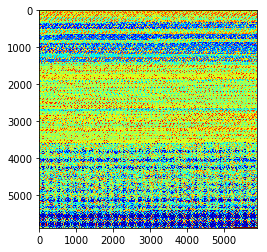

In [16]:
#eval_results = perceptronclassifier.evaluate(input_fn=eval_input_fn)
print(eval_results)
prepare_projector(PROJECTORDIR, scopes)
prepare_sprites(PROJECTORDIR, eval_data)



In [3]:
plt.imshow(eval_data[99])

NameError: name 'eval_data' is not defined

In [4]:
images = np.load(DATADIR+'./ai_images_test.npy') # Returns np.array
train_data = np.asarray([image for image in list(images)])
resist = np.load(DATADIR+'./res_contours_test.npy')
train_labels = np.asarray([image for image in list(resist)], dtype=np.int32)


In [19]:
def create_sprite_image(images):
    """Returns a sprite image consisting of images passed as argument. Images should be count x width x height"""
    if isinstance(images, list):
        images = np.array(images)
    img_h = images.shape[1]//2
    img_w = images.shape[2]//2
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))
    spriteimage = np.ones((img_h * n_plots ,img_w * n_plots ))
    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < images.shape[0]:
                this_img = images[this_filter][::2,::2]
                spriteimage[i * img_h:(i + 1) * img_h, j * img_w:(j + 1) * img_w] = this_img #[::2,::2]
    return spriteimage


In [38]:
plt.imsave('./train_resist_contours.png', create_sprite_image(train_labels), cmap='jet')

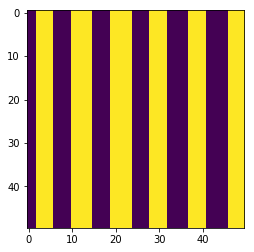

In [11]:
plt.imshow(train_labels[999])